In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import datetime

In [38]:
data = pd.read_csv('../data/preprocessed.csv',parse_dates=True)
data['time'] = data['time'].apply(datetime.datetime.fromisoformat)

In [39]:
def get_month(datetime_obj):
    return datetime_obj.month

Plotting the first 2 weeks of energy data as timeseries

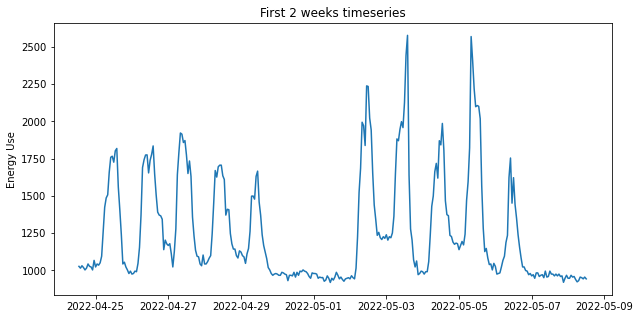

In [40]:
#First two weeks of data
two_weeks_df = data[data['time'] < (data['time'].iloc[0]+ datetime.timedelta(weeks=2))]
#fig = two_weeks_df.plot(x='time',y=['energy'])

#fig size
plt.rcParams["figure.figsize"] = (10,5)
fig = plt.plot(two_weeks_df.time,two_weeks_df.energy)
plt.title("First 2 weeks timeseries")
plt.ylabel("Energy Use")
plt.savefig('../plots/first_2_weeks_energy.png')

Plotting random 2 weeks of data

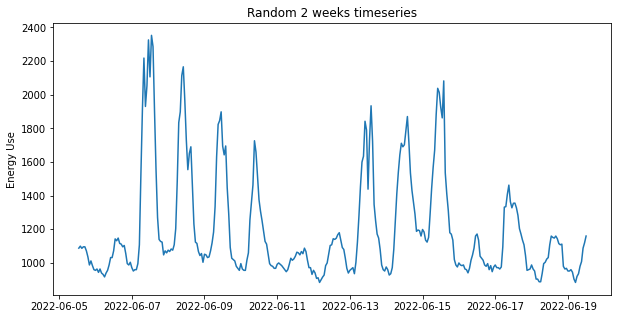

In [41]:
#plotting random 2 weeks of data
week_number = 6

two_weeks_df = data[(data['time'] >= (data['time'].iloc[0] + datetime.timedelta(weeks=week_number))) &  (data['time'] < (data['time'].iloc[0] + datetime.timedelta(weeks=week_number+2)))]
#two_weeks_df.plot(x='time',y=['energy'])

plt.rcParams["figure.figsize"] = (10,5)
fig = plt.plot(two_weeks_df.time,two_weeks_df.energy)
plt.title("Random 2 weeks timeseries")
plt.ylabel("Energy Use")
plt.savefig('../plots/random_2_weeks_energy.png')